In [1]:
# https://machinelearningmastery.com/a-gentle-introduction-to-positional-encoding-in-transformer-models-part-1/

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def getPositionalEncoding(seq_len, d, n=10_000):
    P = np.zeros((seq_len, d))
    for k in range(seq_len):
        for i in np.arange(int(d/2)):
            denominator = np.power(n, 2*i/d)
            P[k, 2*i] = np.sin(k/denominator)
            P[k, 2*i+1] = np.cos(k/denominator)
    return P

P = getPositionalEncoding(seq_len=4, d=4, n=100)
print(P)

[[ 0.          1.          0.          1.        ]
 [ 0.84147098  0.54030231  0.09983342  0.99500417]
 [ 0.90929743 -0.41614684  0.19866933  0.98006658]
 [ 0.14112001 -0.9899925   0.29552021  0.95533649]]


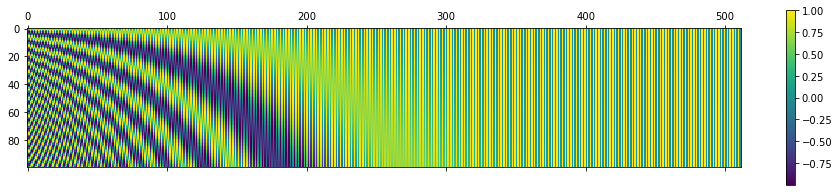

In [23]:
P = getPositionalEncoding(100, 512, 10_000)
cax = plt.matshow(P)
plt.gcf().colorbar(cax)

In [20]:
# https://machinelearningmastery.com/the-transformer-positional-encoding-layer-in-keras-part-2/

In [4]:
import tensorflow as tf
from tensorflow import convert_to_tensor, string
from tensorflow.keras.layers import TextVectorization, Embedding, Layer
from tensorflow.data import Dataset
import numpy as np
import matplotlib.pyplot as plt

In [5]:
output_sequence_length = 5
vocab_size = 10
sentences = [["I am a robot"], ["you too robot"]]
sentence_data = Dataset.from_tensor_slices(sentences)

vectorize_layer = TextVectorization(
    output_sequence_length=output_sequence_length,
    max_tokens=vocab_size
)
vectorize_layer.adapt(sentence_data)
word_tensors = convert_to_tensor(sentences, dtype=tf.string)
vectorized_words = vectorize_layer(word_tensors)

print("vocabulary:", vectorize_layer.get_vocabulary())
print("vectorized words:", vectorized_words)

vocabulary: ['', '[UNK]', 'robot', 'you', 'too', 'i', 'am', 'a']
vectorized words: tf.Tensor(
[[5 6 7 2 0]
 [3 4 2 0 0]], shape=(2, 5), dtype=int64)


In [6]:
output_length=6
word_embedding_layer=Embedding(vocab_size, output_length)
embedded_words = word_embedding_layer(vectorized_words)
print(embedded_words)

tf.Tensor(
[[[-0.04627184  0.00938256 -0.04918605  0.03484602 -0.0208747
    0.03753131]
  [ 0.00636802 -0.0458478  -0.01611384 -0.0251663   0.03883508
    0.03533928]
  [-0.00434308  0.04191847  0.02549827  0.01347587  0.00382683
   -0.01067792]
  [-0.01792079  0.04988435  0.0149304   0.00583047  0.0446567
   -0.01049875]
  [ 0.00405968 -0.00424709  0.03401372 -0.03024745  0.00887469
   -0.01935033]]

 [[ 0.00169678 -0.00877488  0.02655213  0.01306914  0.04645374
   -0.01298998]
  [-0.02815495  0.00231121  0.01589216  0.04650421  0.0298014
   -0.02875785]
  [-0.01792079  0.04988435  0.0149304   0.00583047  0.0446567
   -0.01049875]
  [ 0.00405968 -0.00424709  0.03401372 -0.03024745  0.00887469
   -0.01935033]
  [ 0.00405968 -0.00424709  0.03401372 -0.03024745  0.00887469
   -0.01935033]]], shape=(2, 5, 6), dtype=float32)


In [7]:
position_embedding_layer = Embedding(output_sequence_length, output_length)
position_indices = tf.range(output_sequence_length)
embedded_indices = position_embedding_layer(position_indices)
print(embedded_indices)

tf.Tensor(
[[-0.04318426  0.03442594  0.01265908 -0.012684   -0.04141513 -0.01106841]
 [ 0.00097682  0.02592314  0.01272107  0.0455131   0.02005741 -0.01443114]
 [ 0.04202733  0.0161722  -0.00605918  0.00986625  0.0320926   0.03426102]
 [ 0.04632241  0.02619061 -0.02981361 -0.01248916 -0.04276964 -0.00495296]
 [-0.02052959  0.04410729  0.01985483  0.0019868   0.01311998  0.04596355]], shape=(5, 6), dtype=float32)


In [8]:
final_output_embedding = embedded_words + embedded_indices
print("Final output:", final_output_embedding)

Final output: tf.Tensor(
[[[-0.0894561   0.0438085  -0.03652697  0.02216202 -0.06228983
    0.02646289]
  [ 0.00734484 -0.01992466 -0.00339277  0.02034681  0.05889249
    0.02090814]
  [ 0.03768425  0.05809067  0.01943909  0.02334212  0.03591944
    0.0235831 ]
  [ 0.02840162  0.07607497 -0.01488321 -0.0066587   0.00188706
   -0.01545171]
  [-0.01646991  0.0398602   0.05386855 -0.02826065  0.02199468
    0.02661323]]

 [[-0.04148748  0.02565106  0.03921121  0.00038514  0.00503861
   -0.02405839]
  [-0.02717812  0.02823435  0.02861322  0.09201732  0.04985881
   -0.04318899]
  [ 0.02410654  0.06605656  0.00887122  0.01569672  0.0767493
    0.02376227]
  [ 0.05038209  0.02194352  0.00420011 -0.04273661 -0.03389494
   -0.02430328]
  [-0.01646991  0.0398602   0.05386855 -0.02826065  0.02199468
    0.02661323]]], shape=(2, 5, 6), dtype=float32)


In [9]:
class PositionEmbeddingLayer(Layer):
    def __init__(self, sequence_length, vocab_size, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.word_embedding_layer = Embedding(
            input_dim=vocab_size, output_dim=output_dim
        )
        self.position_embedding_layer = Embedding(
            input_dim=sequence_length, output_dim=output_dim
        )

    def call(self, inputs):
        position_indices = tf.range(tf.shape(inputs)[-1])
        embedded_words = self.word_embedding_layer(inputs)
        embedded_indices = self.position_embedding_layer(position_indices)
        return embedded_words + embedded_indices

In [10]:
my_embedding_layer = PositionEmbeddingLayer(
    output_sequence_length,
    vocab_size,
    output_length
)

embedded_layer_output = my_embedding_layer(vectorized_words)
print("Output from my_embedded_layer:", embedded_layer_output)

Output from my_embedded_layer: tf.Tensor(
[[[ 0.01138308  0.02406271  0.02421699 -0.04218472  0.04451815
    0.07397464]
  [ 0.01291199  0.03579681  0.04156373  0.00192576  0.06233773
   -0.08042483]
  [-0.04354303 -0.02855798 -0.03015205  0.06616972 -0.05413524
    0.00723713]
  [-0.05029887  0.0106812  -0.02142097  0.04648329 -0.01975571
    0.02389668]
  [ 0.04428916  0.05950025 -0.02019578  0.05126188 -0.02788254
   -0.04139966]]

 [[ 0.0520687   0.00555625  0.00398384 -0.01430105  0.00103565
    0.06280132]
  [-0.02711757  0.05556361 -0.02500372  0.06627299 -0.01151759
   -0.08687359]
  [-0.04766423 -0.01162589 -0.09685098  0.02613376 -0.02973428
    0.02075989]
  [ 0.00010436  0.03752742  0.03451226  0.07237539 -0.02411645
    0.02476993]
  [ 0.04428916  0.05950025 -0.02019578  0.05126188 -0.02788254
   -0.04139966]]], shape=(2, 5, 6), dtype=float32)


In [32]:
class PositionEmbeddingFixedWeights(Layer):
    def __init__(self, sequence_length, vocab_size, output_dim, **kwargs):
        super().__init__(**kwargs)
        word_embedding_matrix = self.get_position_encoding(vocab_size, output_dim)
        position_embedding_matrix = self.get_position_encoding(sequence_length, output_dim)
        self.word_embedding_layer = Embedding(
            input_dim=vocab_size, output_dim=output_dim,
            weights=[word_embedding_matrix],
            trainable=False
        )
        self.position_embedding_layer = Embedding(
            input_dim=sequence_length, output_dim=output_dim,
            weights=[position_embedding_matrix],
            trainable=False
        )

    def get_position_encoding(self, seq_len, d, n=10_000):
        P = np.zeros((seq_len, d))
        for k in range(seq_len):
            for i in np.arange(int(d/2)):
                denominator = np.power(n, 2*i/d)
                P[k, 2*i] = np.sin(k/denominator)
                P[k, 2*i+1] = np.cos(k/denominator)
        return P

    def call(self, inputs):
        position_indices = tf.range(tf.shape(inputs)[-1])
        embedded_words = self.word_embedding_layer(inputs)
        embedded_indices = self.position_embedding_layer(position_indices)
        return embedded_words + embedded_indices

In [33]:
technical_phrase = "to understand machine learning algorithms you need" +\
                   " to understand concepts such as gradient of a function "+\
                   "Hessians of a matrix and optimization etc"
wise_phrase = "patrick henry said give me liberty or give me death "+\
              "when he addressed the second virginia convention in march"

total_vocabulary = 200
sequence_length = 20
final_output_len = 50
phrase_vectorization_layer = TextVectorization(
                  output_sequence_length=sequence_length,
                  max_tokens=total_vocabulary)
# Learn the dictionary
phrase_vectorization_layer.adapt([technical_phrase, wise_phrase])
# Convert all sentences to tensors
phrase_tensors = convert_to_tensor([technical_phrase, wise_phrase], 
                                   dtype=tf.string)
# Use the word tensors to get vectorized phrases
vectorized_phrases = phrase_vectorization_layer(phrase_tensors)

random_weights_embedding_layer = PositionEmbeddingLayer(sequence_length, 
                                                        total_vocabulary,
                                                        final_output_len)
fixed_weights_embedding_layer = PositionEmbeddingFixedWeights(sequence_length, 
                                                        total_vocabulary,
                                                        final_output_len)
random_embedding = random_weights_embedding_layer(vectorized_phrases)
fixed_embedding = fixed_weights_embedding_layer(vectorized_phrases)

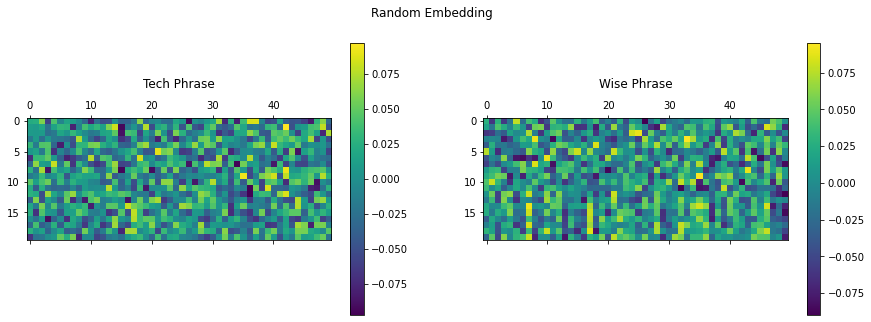

In [34]:
fig = plt.figure(figsize=(15, 5))    
title = ["Tech Phrase", "Wise Phrase"]
for i in range(2):
    ax = plt.subplot(1, 2, 1+i)
    matrix = tf.reshape(random_embedding[i, :, :], (sequence_length, final_output_len))
    cax = ax.matshow(matrix)
    plt.gcf().colorbar(cax)   
    plt.title(title[i], y=1.2)
fig.suptitle("Random Embedding")
plt.show()

In [1]:
fig = plt.figure(figsize=(15, 5))    
title = ["Tech Phrase", "Wise Phrase"]
for i in range(2):
    ax = plt.subplot(1, 2, 1+i)
    matrix = tf.reshape(fixed_embedding[i, :, :], (sequence_length, final_output_len))
    cax = ax.matshow(matrix)
    plt.gcf().colorbar(cax)   
    plt.title(title[i], y=1.2)
fig.suptitle("Fixed Weight Embedding from Attention is All You Need")
plt.show()

NameError: name 'plt' is not defined